In [15]:
#imports required
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [16]:
# merging the files
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "Sales_Data/Sales_*.csv"))))
df.to_csv("data.csv",index=False)

In [17]:
#Remove NaN rows
df=df.dropna(how='all')
df=df[df['Order Date'].str[0:2]!='Or']

In [18]:
#Convert columns to correct data type
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
df['Price Each']=df['Price Each'].astype('float32')

In [19]:
#Add Month column
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')

In [20]:
#Add Sales column
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [21]:
#Month with best sales
results=df.groupby('Month').sum()

Text(0.5, 0, 'Month number')

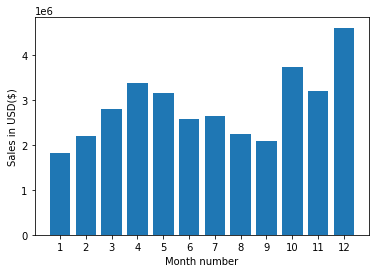

In [22]:
#Visualization
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')

In [23]:
#City that sold most product
def get_city(add):
    return add.split(",")[1]

def get_state(add):
    return add.split(",")[2].split(" ")[1]

df['City']=df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
results=df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.250,104794,2.795498e+06
Austin (TX),11153,1809873.625,69829,1.819582e+06
Boston (MA),22528,3637409.750,141112,3.661642e+06
Dallas (TX),16730,2752627.750,104620,2.767976e+06
Los Angeles (CA),33289,5421435.000,208325,5.452571e+06
New York City (NY),27932,4635371.000,175741,4.664318e+06
Portland (ME),2750,447189.250,17144,4.497583e+05
Portland (OR),11303,1860558.250,70621,1.870732e+06
San Francisco (CA),50239,8211461.500,315520,8.262204e+06


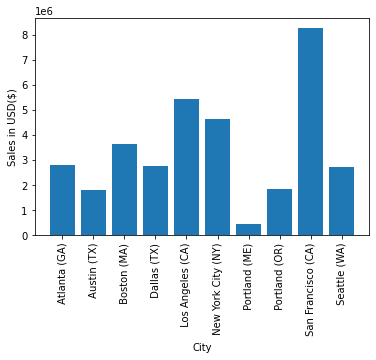

In [24]:
#Visualization
City=[city for city,df in df.groupby('City')]
plt.bar(City,results['Sales'])
plt.xticks(City, rotation='vertical')
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.000000,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.000000,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.950000,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta (GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.990000,Boston (MA),19,2
13618,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.990005,New York City (NY),19,29
13619,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco (CA),18,57
13620,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco (CA),18,35


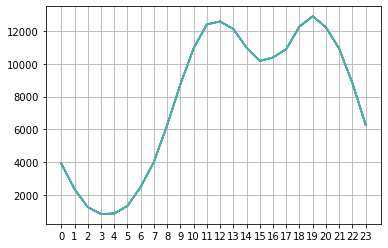

In [25]:
#Time to display advertisemens to maximize the likelihood of customer’s buying product
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
hours=[hour for hour,df in df.groupby('Hour')]
plt.plot(hours,df.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
df

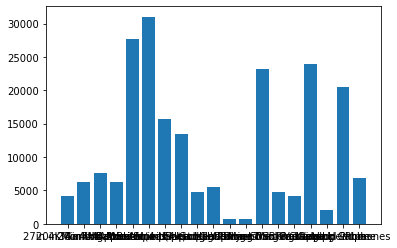

In [29]:
#Product that sold the most
product=df.groupby('Product')
quantity=product.sum()['Quantity Ordered']

products=[product for product,df in product]
plt.bar(products,quantity)
p
plt.show()

In [13]:
#Products sold together most often
df=df[df['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:",".join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
count=Counter()
for row in df['Grouped']:
    r_l=row.split(",")
    count.update(Counter(combinations(r_l,2)))    
count.most_common(10)

<ipython-input-13-2540ab706d64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:",".join(x))


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]